In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

Cross-entropy loss:

In [3]:
def cross_entropy(y, t):
  loss = np.mean(-t*np.log(y) - (1.-t)*np.log(1.-y))
  return loss

In [4]:
'''
Se puede calcular el error en la preactivacion : la funcion lineal que tenemos (z) antes de pasarla por sigmoid
'''
def cross_entropy_from_logits(z, t):
  a = np.log(1. + np.exp(-z))
  loss = np.mean(a + z - t*z)
  return loss

Precisión:

In [5]:
def accuracy(y, t):
  pred = y > 0.5
  return np.mean(pred == t)

Generación de los datos del problema:

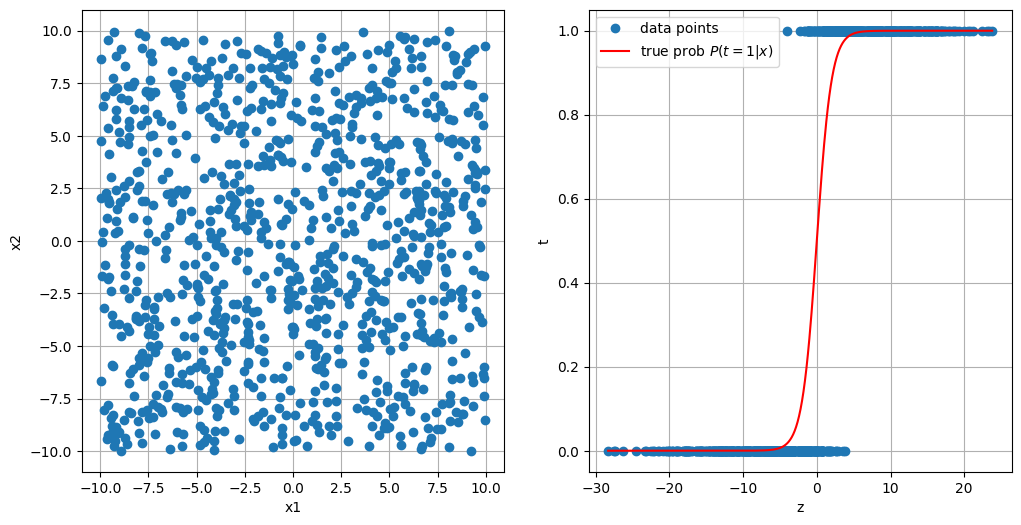

Cross-entropy esperada = 0.127179
Cross-entropy esperada (logits) = 0.127179
Accuracy esperada = 0.942000


In [6]:
# Parametros:
d = 5 # Dimension del problema
w = np.random.randn(d, 1)
b = 0.0
xmin = -10.0
xmax = 10.0
noise = 1.0
n = 1000

# Datos del problema generados al azar:
x = xmin + np.random.rand(d, n)*(xmax - xmin)
z = np.dot(w.T, x) + b 
zmin = np.min(z)
zmax = np.max(z)
t0 = sigmoid(z)
t = 1*(t0 > np.random.rand(n))

# Distribucion de las dos primeras variables:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(x[0,:], x[1,:], 'o')
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(122)

# Grafica de t frente a z:
zrange = np.arange(zmin, zmax, 0.1)
plt.plot(z[0], t[0], 'o', label='data points')
plt.plot(zrange, sigmoid(zrange), 'r-', label='true prob $P(t = 1 | x)$')
plt.grid(True)
plt.xlabel("z")
plt.ylabel("t")
plt.legend()
plt.show()

# Coste esperado:
loss = cross_entropy(t0, t)
print("Cross-entropy esperada = %f" % loss)
loss = cross_entropy_from_logits(z, t)
print("Cross-entropy esperada (logits) = %f" % loss)

# Accuracy:
acc = accuracy(t0, t)
print("Accuracy esperada = %f" % acc)

Modelo de regresión logística con los parámetros inicializados al azar:

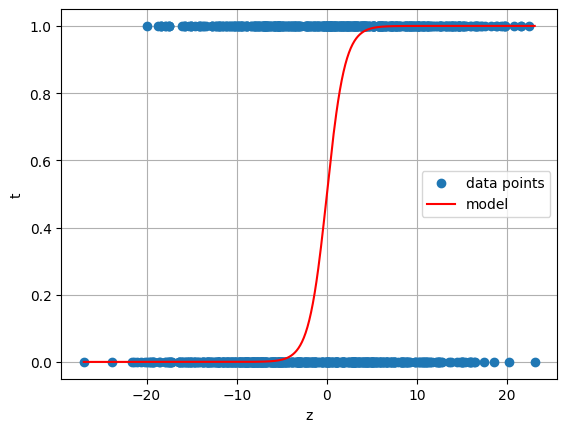

Cross-entropy = 2.781517
Accuracy = 0.600000


In [7]:
w = np.random.randn(d, 1)
b = np.random.randn()

# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
z = np.dot(w.T, x) + b
zmin = np.min(z)
zmax = np.max(z)
y = sigmoid(z)

# Grafica de y frente a z:
zrange = np.arange(zmin, zmax, 0.1)
plt.plot(z[0], t[0], 'o', label='data points')
plt.plot(zrange, sigmoid(zrange), 'r-', label='model')
plt.grid(True)
plt.xlabel("z")
plt.ylabel("t")
plt.legend()
plt.show()

# Coste:
loss = cross_entropy_from_logits(z, t)
print("Cross-entropy = %f" % loss)

# Accuracy:
acc = accuracy(y, t)
print("Accuracy = %f" % acc)

Entrenamiento del modelo:

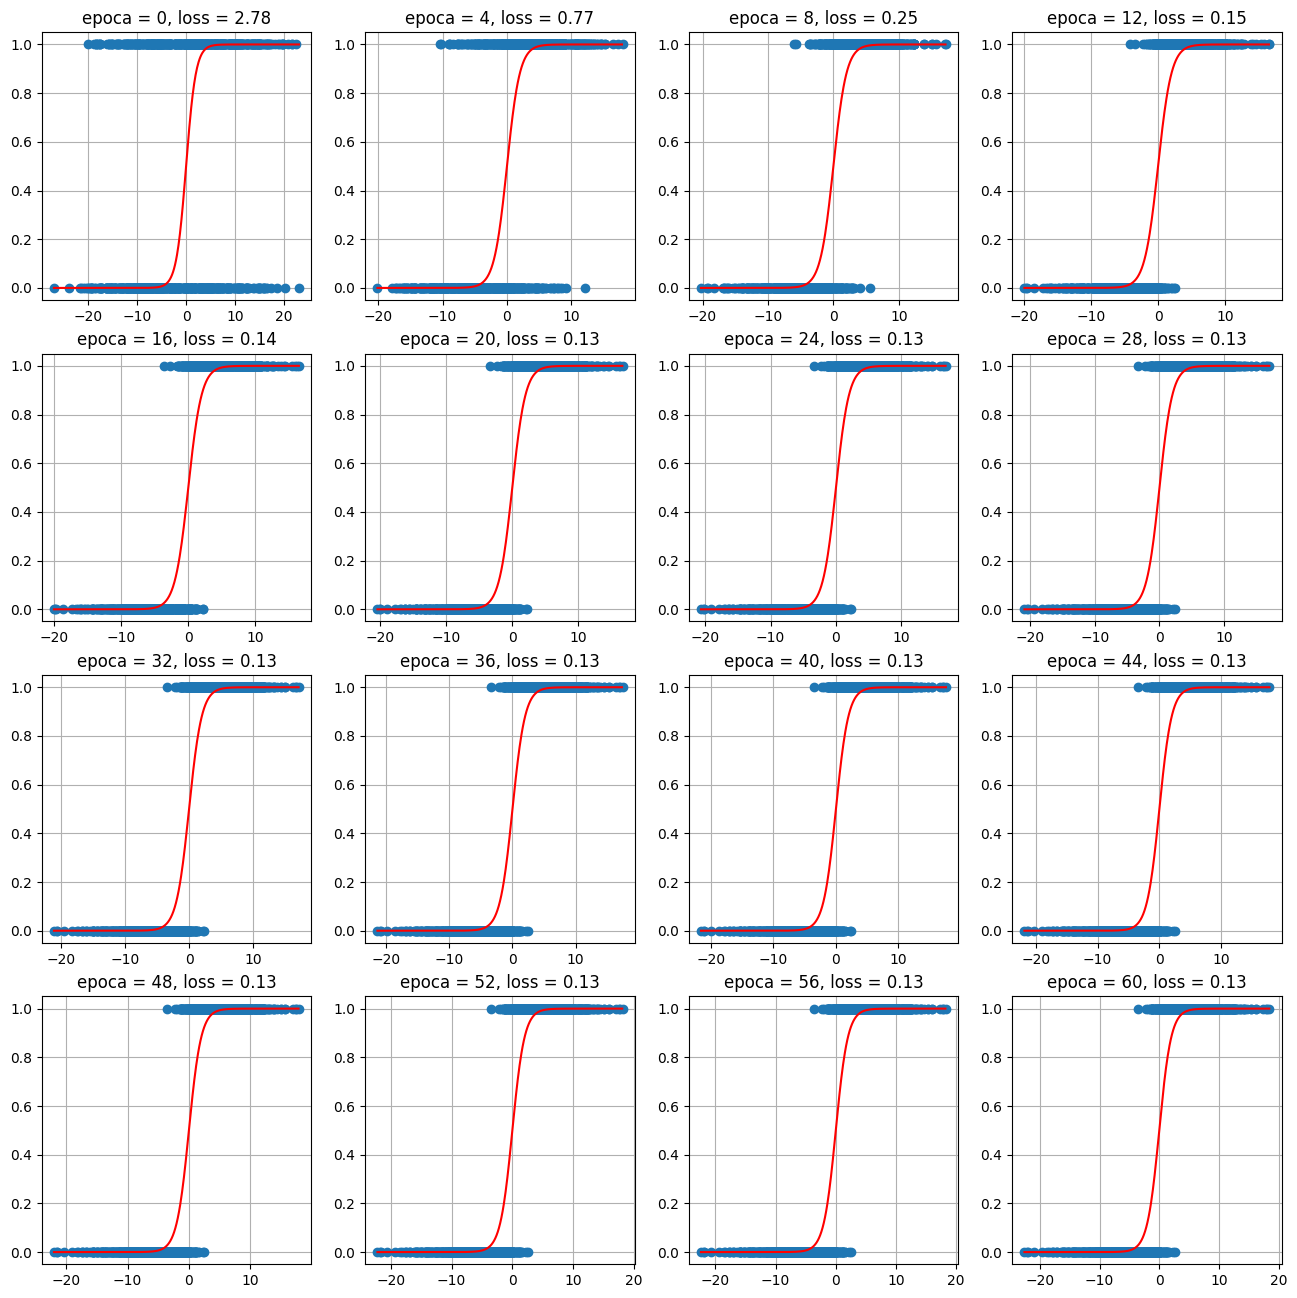

In [8]:
nepocas = 64
eta = 0.0001

plt.figure(figsize=(16,16))

k = 1
loss = []
acc = []
for i in range(nepocas):
    z = np.dot(w.T, x) + b
    zmin = np.min(z)
    zmax = np.max(z)
    y = sigmoid(z)

    #----------------------------------------------------------
    # TO-DO: Calcula el coste cross-entropy y la precision (acc), 
    # y añadelos a las listas loss y acc:
    xe = cross_entropy(y, t)
    loss.append(xe)
    a = accuracy(y, t)
    acc.append(a)

    #----------------------------------------------------------

    if i%4 == 0:
        zrange = np.arange(zmin, zmax, 0.1)
        plt.subplot(4, 4, k)
        plt.plot(z[0], t[0], 'o')
        plt.plot(zrange, sigmoid(zrange), 'r-')
        plt.grid(True)
        plt.title("epoca = %d, loss = %.2f" % (i, loss[-1]))
        k += 1

    #----------------------------------------------------------
    # TO-DO: Calcula los gradientes y actualiza los parametros:
    y_minus_t = y - t
    db = y_minus_t.sum()
    dw = x @ y_minus_t.T
    b -= eta * db
    w -= eta * dw

    #----------------------------------------------------------

plt.show()

Cross-entropy y accuracy frente a número de épocas:

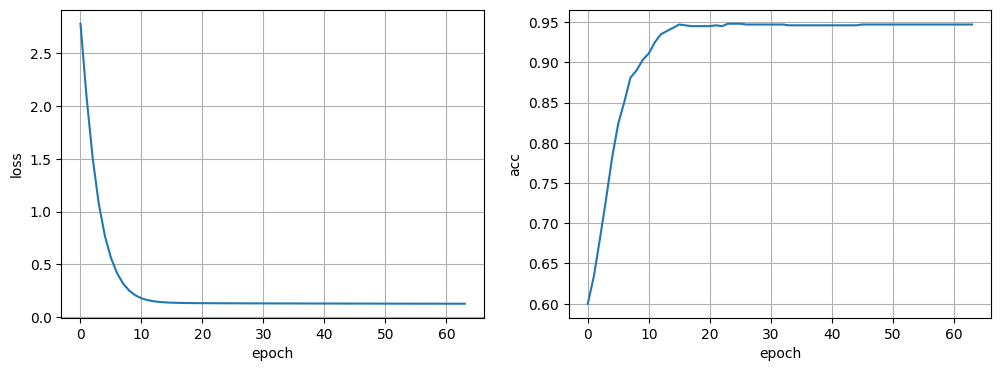

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(range(nepocas), loss)
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(1,2,2)
plt.plot(range(nepocas), acc)
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()